In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Image Shape : 512 x 512


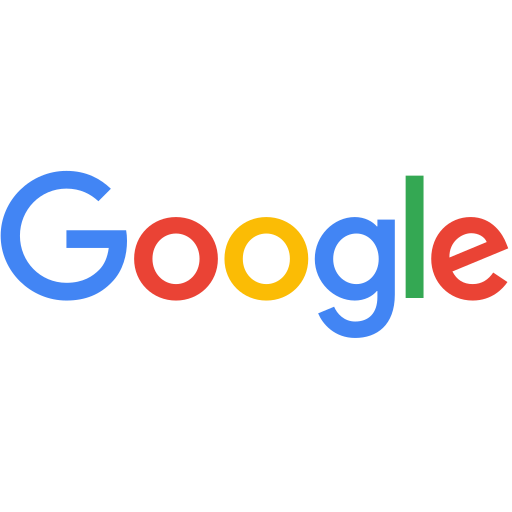

In [2]:
from PIL import Image, ImageFilter

image_obj = Image.open("Images/Google.png")
image = np.asarray(image_obj)

print("Image Shape :", image.shape[0], "x", image.shape[1])
image_obj

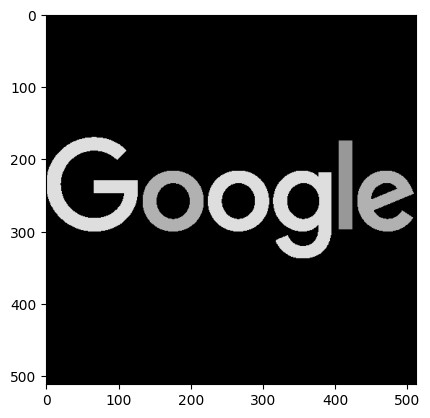

In [3]:
### Gray Scale Image

grey_scale = np.mean(image[:, :, :3], axis=2) / 255.0
plt.imshow(grey_scale, cmap="gray")

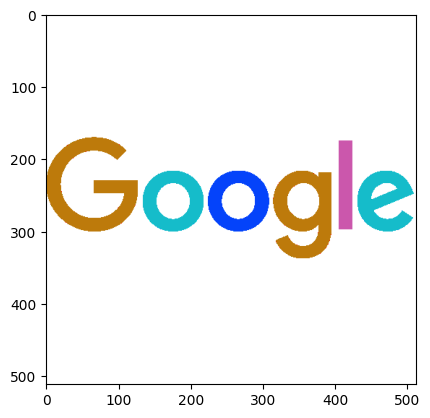

In [4]:
# Negative of the image

negative_image = 255 - image[:, :, :3]
plt.imshow(negative_image)

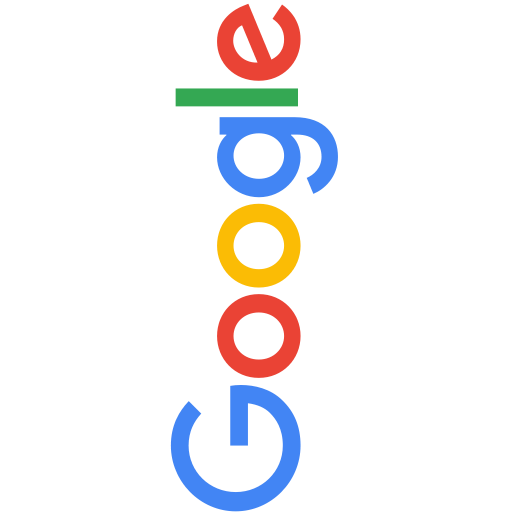

In [5]:
# 90 degree rotation

rotation_90 = image_obj.rotate(90)
rotation_90

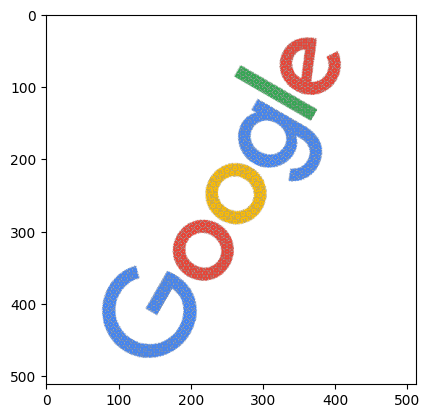

In [6]:
# Rotation without in-built function

def rotate_image(image, theta):
    
    theta = math.radians(theta)
    height, width = len(image), len(image[0])
    
    center_x, center_y = width/2, height/2
    
    rotate_image = np.full(image.shape, 0)
    
    for i in range(height):
        for j in range(width):
            x = i - center_x
            y = j - center_y
            
            new_x = int(x * math.cos(theta) - y * math.sin(theta) + center_x)
            new_y = int(x * math.sin(theta) + y * math.cos(theta) + center_y)
            
            if 0 <= new_x < width and 0 <= new_y < height:
                rotate_image[new_x][new_y] = image[i][j]
    
    return rotate_image

plt.imshow(rotate_image(image, 60))

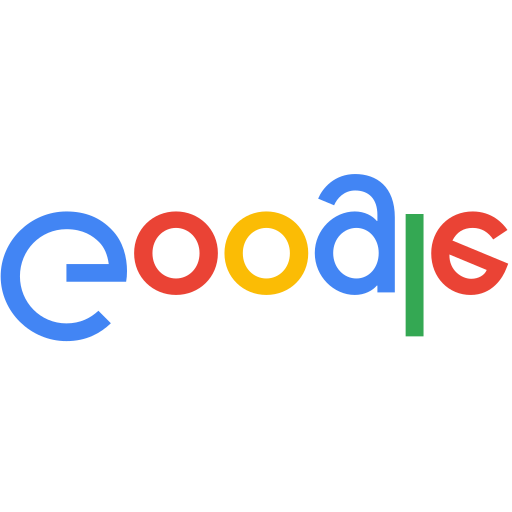

In [7]:
# Vertical Flip

vertical_flip = image_obj.transpose(method=Image.FLIP_TOP_BOTTOM)
vertical_flip

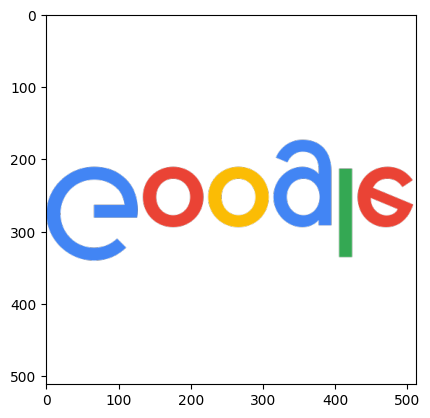

In [8]:
# Vertical Flip without in-built function

def vertical_flip(image):
    
    height, width = len(image), len(image[0])
    
    vertical_image = np.full(image.shape, 0)
    
    for i in range(width):
        vertical_image[:, i] = image[:, i][::-1]
        
    return vertical_image

plt.imshow(vertical_flip(image))

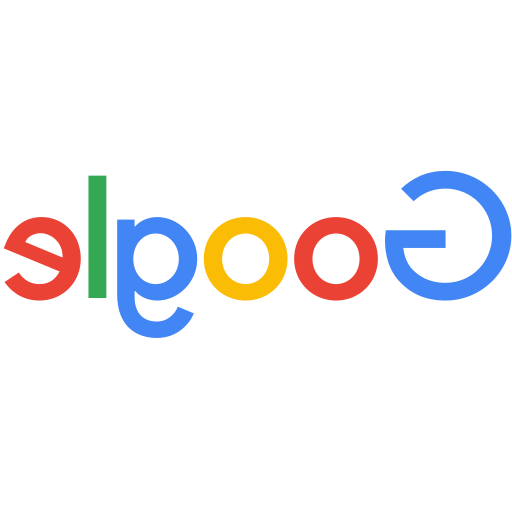

In [9]:
# horizontal flip

horizontal_flip = image_obj.transpose(method=Image.FLIP_LEFT_RIGHT)
horizontal_flip

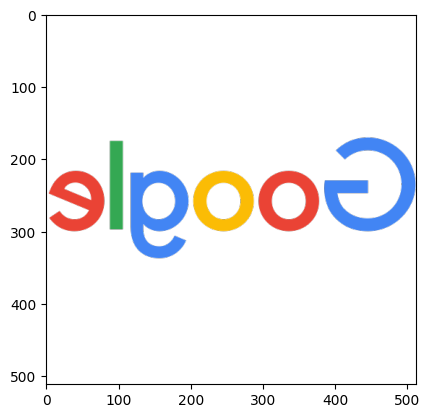

In [10]:
# Horizontal flip without in-built function

def horizontal_flip(image):
    
    height, width = len(image), len(image[0])
    
    horizontal_image = np.full(image.shape, 0)
    
    for i in range(height):
        horizontal_image[i, :] = image[i, :][::-1]
        
    return horizontal_image

plt.imshow(horizontal_flip(image))

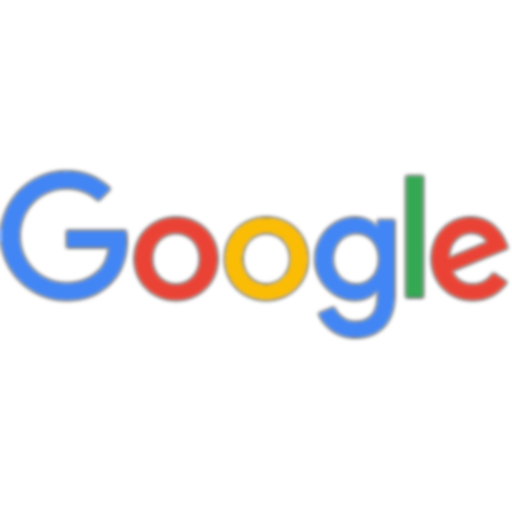

In [11]:
# Gaussian Blur 

gaussian_blur = image_obj.filter(ImageFilter.GaussianBlur(radius=2))
gaussian_blur

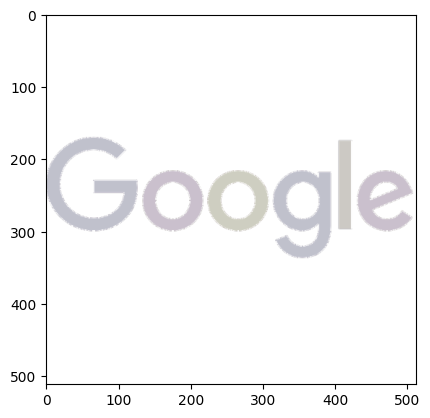

In [12]:
# Gaussian Blur without in-built function

def gaussian_blur(image):

    kernel = [
        [1, 1],
        [1, 1]
    ]

    height, width = len(image), len(image[0])
    blurred_image = np.full(image.shape, 0)

    for i in range(height - len(kernel)):
        for j in range(width - len(kernel)):
            blurred_pixel = sum(
                image[i + m][j + n] * kernel[m][n]
                for m in range(len(kernel)) for n in range(len(kernel))
            ) // sum(sum(val) for val in kernel)

            blurred_image[i][j] = blurred_pixel

    return blurred_image

plt.imshow(gaussian_blur(image))